In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy Dataset
X = np.array([[-1,1,-1], [-1,1,-1], [-1,1,1]])

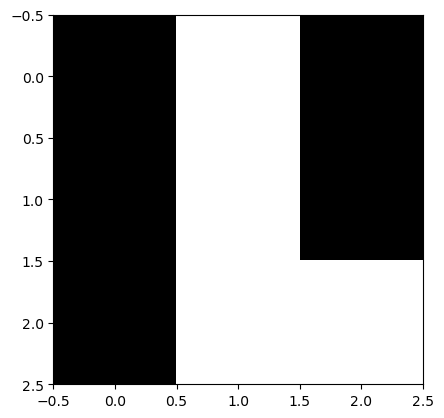

In [18]:
plt.imshow(X, cmap='gray',)

In [14]:
class HopfieldNetwork:
    def __init__(self, samples):
        self.t = 1 # Time step
        self.n = samples[0].flatten().shape[0] # Number of neurons
        self.states = np.random.uniform(-1, 1, self.n) # Random initial state uniformly distributed between -1 and 1
        
        # Initialize weights
        self.weights = np.zeros((self.n, self.n))
        for sample in samples:
            self.weights += np.outer(sample, sample)
        self.weights /= self.n
        np.fill_diagonal(self.weights, 0)

        # Store update history and energy for plotting
        self.update_history = {}
        self.energy_history = []

    def async_update(self):
        """Update the state of a random neuron asynchronously."""
        i = np.random.randint(self.n)
        net_input = np.dot(self.weights[i], self.states)
        self.states[i] = 1 if net_input > 0 else -1
        return i

    def update_until_convergence(self, max_stable_iterations: int = 20) -> None:
        """Updates network until state converges or max iterations reached.
        Maintains alternating history of states and updated indices."""
        
        def _record_state():
            self.update_history[self.t] = {
                "states": self.states.copy().tolist(),
                "t": self.t
            }
            self.t += 1

        def _record_update(idx):
            self.update_history[self.t] = {
                "idx_updated": idx
            }
            self.t += 1

        stable_count = 0
        _record_state()  # Record initial state

        while stable_count < max_stable_iterations:
            print(f"Updating states t={self.t}")
            previous_states = np.copy(self.states)
            
            # Update and record both steps
            updated_idx = self.async_update()
            _record_update(updated_idx)
            _record_state()
            
            print(f"States: {self.states}")
            energy = self.calculate_energy()
            self.energy_history.append({
                "t": self.t,
                "energy": energy
            })
            print(f"Energy: {energy}")

            # Check stability
            stable_count = (stable_count + 1) if np.array_equal(previous_states, self.states) else 0
        
    def calculate_energy(self):
        """Calculate the energy of the current state."""
        states = self.states.reshape(-1,1)
        energy = -0.5 * np.dot(states.T, np.dot(self.weights, states))
        return energy.item()
    
    def export_history(self):
        return self.update_history
    
    def export_energy_history(self, save_json=True):
        """Plot energy vs timestep and optionally export data."""
        
        print(self.energy_history)
        
        # Export data
        if save_json:
            with open('./energy_history.json', 'w') as f:
                json.dump(self.energy_history, f)

    def plot_history(self):
        """Plot weights matrix and energy history."""
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        fig.suptitle('Hopfield Network Analysis')

        sns.heatmap(self.weights, ax=ax1, cmap='coolwarm', center=0)
        ax1.set_title('Weight Matrix')
        ax1.set_xlabel('Neuron j')
        ax1.set_ylabel('Neuron i')

        times = [e['t'] for e in self.energy_history]
        energies = [e['energy'] for e in self.energy_history]
        ax2.plot(times, energies, 'b-', linewidth=2)
        ax2.set_title('Energy vs Time')
        ax2.set_xlabel('Time Step')
        ax2.set_ylabel('Energy')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

   

In [15]:
t = HopfieldNetwork(X)
t.update_until_convergence()

Updating states t=2
States: [ 0.49945186 -1.         -0.17944331]
Energy: -0.40976299219395873
Updating states t=4
States: [ 0.49945186 -1.          1.        ]
Energy: -0.9992691468058759
Updating states t=6
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=8
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=10
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=12
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=14
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=16
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=18
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=20
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=22
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=24
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=26
States: [ 1. -1.  1.]
Energy: -1.6666666666666665
Updating states t=28
States: [ 1

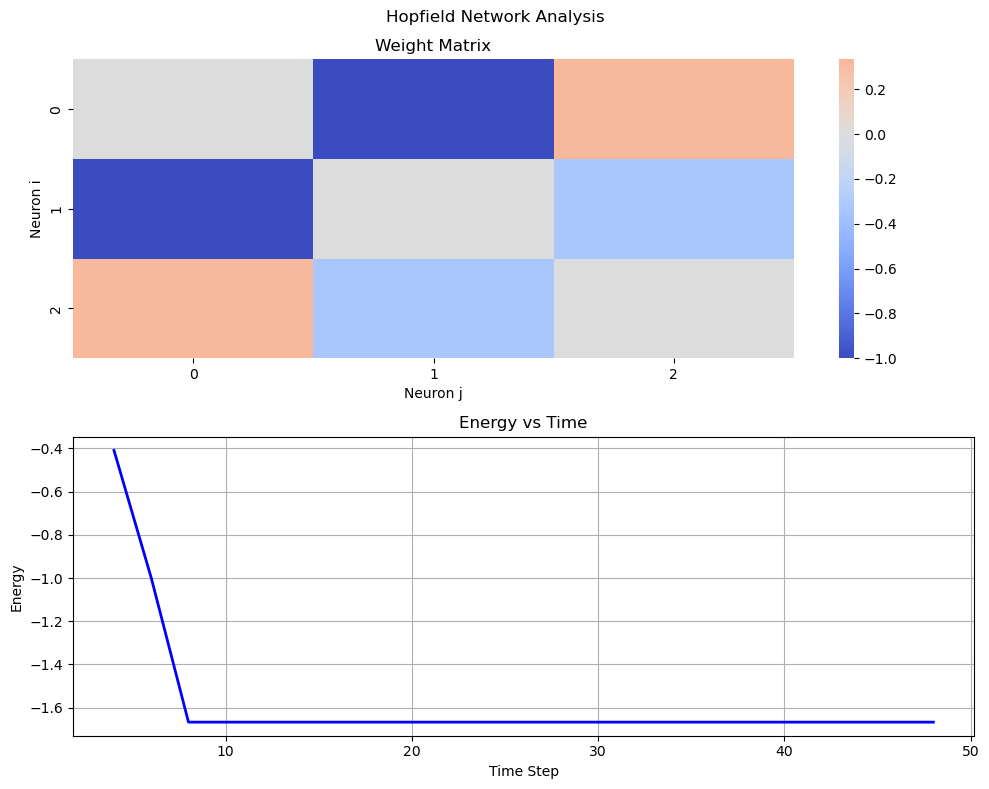

In [16]:
t.plot_history()